In [53]:
import numpy as np
import pandas as pd
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
#Run the below piece of code for the first time
#nltk.download('stopwords')

In [54]:
message_data = pd.read_csv("spam_ham.csv",encoding = "latin")
message_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [55]:
message_data = message_data.rename(columns = {'Category':'Spam/Not_Spam','Message':'message'})

In [56]:
message_data.columns

Index(['Spam/Not_Spam', 'message'], dtype='object')

In [57]:
message_data.groupby('Spam/Not_Spam').describe()

message         \
                count unique   
Spam/Not_Spam                  
ham              4825   4516   
spam              747    641   

                                                                       
                                                             top freq  
Spam/Not_Spam                                                          
ham                                       Sorry, I'll call later   30  
spam           Please call our customer service representativ...    4

In [58]:
message_data_copy = message_data['message'].copy()

In [59]:
def text_preprocess(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    return " ".join(text)

In [60]:
message_data_copy = message_data_copy.apply(text_preprocess)

In [61]:
message_data_copy

0       Go jurong point crazy Available bugis n great ...
1                                 Ok lar Joking wif u oni
2       Free entry 2 wkly comp win FA Cup final tkts 2...
3                     U dun say early hor U c already say
4             Nah dont think goes usf lives around though
                              ...                        
5567    2nd time tried 2 contact u U Â£750 Pound prize...
5568                         Ã¼ b going esplanade fr home
5569                          Pity mood Soany suggestions
5570    guy bitching acted like id interested buying s...
5571                                       Rofl true name
Name: message, Length: 5572, dtype: object

In [62]:
vectorizer = TfidfVectorizer()

In [63]:
message_mat = vectorizer.fit_transform(message_data_copy)
message_mat

<5572x9455 sparse matrix of type '<class 'numpy.float64'>'
	with 47571 stored elements in Compressed Sparse Row format>

In [76]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
message_data['Spam/Not_Spam']= label_encoder.fit_transform(message_data['Spam/Not_Spam'])

In [77]:
message_train, message_test, spam_nospam_train, spam_nospam_test = train_test_split(message_mat, 
                                                        message_data['Spam/Not_Spam'], test_size=0.3, random_state=20)

In [81]:
spam_nospam_train

2905    0
4569    0
1365    0
2235    0
567     0
       ..
1607    0
3915    0
1428    0
4367    0
2522    0
Name: Spam/Not_Spam, Length: 3900, dtype: int64

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Spam_model = LogisticRegression(solver='liblinear', penalty='l1')
Spam_model.fit(message_train, spam_nospam_train)
predicted_labels = Spam_model.predict(message_test)

Accuracy score improved. Let's try normalizing length.

In [84]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

In [85]:
# Confusion Matrix
confusion = confusion_matrix(spam_nospam_test, predicted_labels)
print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[1424   12]
 [  88  148]]


In [86]:
# Accuracy
accuracy = accuracy_score(spam_nospam_test, predicted_labels)
print("Accuracy:", accuracy)

Accuracy: 0.9401913875598086


In [89]:
# Precision
precision = precision_score(list(spam_nospam_test), list(predicted_labels))
print("Precision:", precision)

Precision: 0.925


In [90]:
# Recall (Sensitivity or True Positive Rate)
recall = recall_score(spam_nospam_test, predicted_labels)
print("Recall (Sensitivity):", recall)

Recall (Sensitivity): 0.6271186440677966


In [91]:
# F1 Score (harmonic mean of precision and recall)
f1 = f1_score(spam_nospam_test, predicted_labels)
print("F1 Score:", f1)

F1 Score: 0.7474747474747475


In [92]:
# ROC-AUC Score
roc_auc = roc_auc_score(spam_nospam_test, predicted_labels)
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.8093810490533969


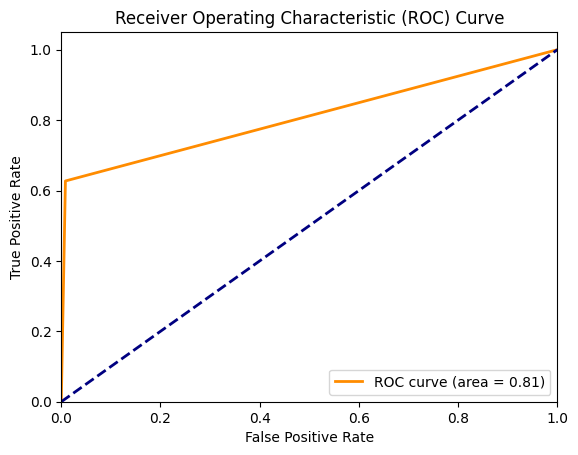

In [93]:
# ROC Curve
fpr, tpr, _ = roc_curve(spam_nospam_test, predicted_labels)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()